<a href="https://colab.research.google.com/github/dixitganesh15/Deep-Learning/blob/master/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv(r"/content/Churn_Modelling.csv")

In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
gen = pd.get_dummies(df['Gender'], drop_first=True)
geo = pd.get_dummies(df['Geography'], prefix='Country',drop_first=True)

In [0]:
df = pd.concat([df,gen,geo], axis=1)

In [0]:
df.drop(['CustomerId','Surname','Geography','Gender'], axis=1, inplace=True)

In [0]:
df.shape

(10000, 13)

In [0]:
df.drop(['RowNumber'], axis=1, inplace=True)

In [0]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Country_Germany    0
Country_Spain      0
dtype: int64

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

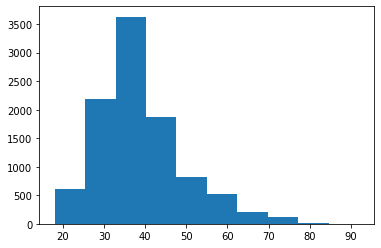

In [0]:
plt.hist('Age',data=df, bins=10)

In [0]:
# sns.pairplot(df)

In [0]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [0]:
X.shape

(10000, 11)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
import tensorflow.keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [0]:
model = Sequential()

model.add(Dense(16, activation='relu', kernel_initializer='he_uniform',input_dim=11))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 1s 3ms/step - loss: 0.6197 - accuracy: 0.7480 - val_loss: 0.5320 - val_accuracy: 0.7967
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7942 - val_loss: 0.5084 - val_accuracy: 0.7967
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7947 - val_loss: 0.5010 - val_accuracy: 0.7967
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7955 - val_loss: 0.4799 - val_accuracy: 0.7967
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7952 - val_loss: 0.4646 - val_accuracy: 0.7967
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7958 - val_loss: 0.4569 - val_accuracy: 0.7967
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7970 - val_loss: 0.4477 - val_accuracy: 0.7967
Epoch 

In [0]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
accuracy_score(y_test, y_pred)

0.8124

In [0]:
confusion_matrix(y_test, y_pred)

array([[1968,   23],
       [ 446,   63]])

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1991
           1       0.73      0.12      0.21       509

    accuracy                           0.81      2500
   macro avg       0.77      0.56      0.55      2500
weighted avg       0.80      0.81      0.75      2500



In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Activation, Dense,  Dropout

In [0]:
def new_model(layers, activation):
  model = Sequential()
  for i,nodes in enumerate(layers):
    if i == 0:
      model.add(Dense(nodes, input_dim = X_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.2))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')) 

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
  return model

In [0]:
model = KerasClassifier(build_fn=new_model,verbose = 0)

In [0]:
layers = [[8,10,12],[8]]
activation = ['sigmoid','relu']
# drop = [0.1,0.2,0.3,0.4,0.5]
param = dict(layers=layers, activation =activation, batch_size=[64,128], epochs=[10])

grid = GridSearchCV(estimator=model,param_grid=param,cv=10 )

In [0]:
grid_res = grid.fit(X_train,y_train)

RuntimeError: ignored